21MIS1127 AI E COMMERCE AGENT ASSIGNMENT 

In [16]:
!pip install fastapi uvicorn[standard] sqlalchemy pandas plotly langchain-community
!pip install nest-asyncio pyngrok  
!pip install ollama 

zsh:1: no matches found: uvicorn[standard]


In [11]:
import subprocess
import sys

try:
    result = subprocess.run(['ollama', '--version'], capture_output=True, text=True)
    print("Ollama installation verified:", result.stdout)
except FileNotFoundError:
    print("Ollama not found in PATH. Please restart your terminal or check installation.")


Ollama installation verified: ollama version is 0.9.6



**To start an ollama server and also to test it**

In [13]:
import subprocess
import time
import threading

# Start Ollama server in background
def start_ollama_server():
    try:
        # On Linux/macOS, this will start the server
        subprocess.run(['ollama', 'serve'], check=True)
    except subprocess.CalledProcessError:
        print("Ollama server might already be running")

# Start server in a separate thread
server_thread = threading.Thread(target=start_ollama_server, daemon=True)
server_thread.start()

# Give the server time to start
time.sleep(3)
print("Ollama server should now be running on http://localhost:11434")


Error: listen tcp 127.0.0.1:11434: bind: address already in use


Ollama server might already be running
Ollama server should now be running on http://localhost:11434


**to know and lost the ollama models available and downloaded**

In [1]:
import subprocess

try:
    result = subprocess.run(['ollama', 'list'], capture_output=True, text=True)
    print("Available models:\n", result.stdout)
except Exception as e:
    print(f"Error listing models: {e}")


Available models:
 NAME               ID              SIZE      MODIFIED    
llama3.1:latest    46e0c10c039e    4.9 GB    3 hours ago    
llama3.1:8b        46e0c10c039e    4.9 GB    3 hours ago    



**to load the datasets**

In [5]:
import pandas as pd
import sqlite3
from pathlib import Path

# Load your provided CSV files
eligibility_df = pd.read_csv(r'/Users/tarunvinod_8317/Desktop/Product-Level Eligibility Table.csv')
ad_metrics_df = pd.read_csv(r'/Users/tarunvinod_8317/Desktop/Product-Level Ad Sales and Metrics.csv')
total_sales_df = pd.read_csv(r'/Users/tarunvinod_8317/Desktop/Product-Level Total Sales and Metrics.csv')

# Display basic info about your datasets
print("Eligibility Data Shape:", eligibility_df.shape)
print("Ad Metrics Data Shape:", ad_metrics_df.shape)
print("Total Sales Data Shape:", total_sales_df.shape)

# Preview the data
eligibility_df.head()


Eligibility Data Shape: (4381, 4)
Ad Metrics Data Shape: (3696, 7)
Total Sales Data Shape: (702, 4)


,eligibility_datetime_utc,item_id,eligibility,message
0,2025-06-04 8:50:07,29,False,This product's cost to Amazon does not allow u...
1,2025-06-04 8:50:07,270,True,NaN
2,2025-06-04 8:50:07,31,True,NaN
3,2025-06-04 8:50:07,26,True,NaN
4,2025-06-04 8:50:07,25,True,NaN


In [7]:
# Create SQLite database
db_path = "ecommerce.db"
conn = sqlite3.connect(db_path)

# Convert DataFrames to SQL tables
eligibility_df.to_sql("product_eligibility", conn, if_exists="replace", index=False)
ad_metrics_df.to_sql("ad_metrics", conn, if_exists="replace", index=False)
total_sales_df.to_sql("total_sales", conn, if_exists="replace", index=False)

conn.close()
print(f"Database created successfully at {db_path}")

# Verify tables were created
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Created tables:", [table[0] for table in tables])
conn.close()


Database created successfully at ecommerce.db
Created tables: ['product_eligibility', 'ad_metrics', 'total_sales']


In [15]:
!pip install -U langchain langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.8 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 kB 48.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.0/368.0 kB 41.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 148.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 30.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 57.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 74.2 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.22.0
    Uninstalling zstandard-0.22.0:
      Successfully uninstalled zstandard-0.22.0


In [19]:
!pip install -U langchain-ollama

In [9]:
from langchain_ollama import OllamaLLM
from langchain_community.agent_toolkits import create_sql_agent
from langchain_community.utilities import SQLDatabase
import os

db_path = "/Users/tarunvinod_8317/database.db"

# Check if the file exists
if not os.path.exists(db_path):
    raise FileNotFoundError(f"❌ Database file not found at {db_path}")

db = SQLDatabase.from_uri(f"sqlite:///{db_path}")

# Initialize LLM with CORRECT model name
llm = OllamaLLM(
    model="llama3.1",
    temperature=0
)

# Create SQL Agent
sql_agent = create_sql_agent(
    llm=llm,
    db=db,
    verbose=True,
    agent_type="zero-shot-react-description",
    max_iterations=5
)

print("✅ SQL Agent created successfully!")


✅ SQL Agent created successfully!


In [11]:
# Test with corrected model name
test_question = "What is my total sales?"
try:
    response = sql_agent.invoke({"input": test_question})
    print("Question:", test_question)
    print("Answer:", response["output"])
    print("✅ Success! Your AI agent is working correctly.")
except Exception as e:
    print(f"❌ Error: {e}")




> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsI'll start by listing the tables in the database.

Question: What is my total sales?
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from here.

Question: What is my total sales?
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from where we left off.

Question: What is my total sales?
Thought: Since the database contains a table called "products", it's likely that there are other tables related to sales, such as an orders or invoices table. I should query the schema of these tables to see what columns they contain.
Action: sql_db_schema
Action Input: products, orders, invoicesError: table_na

In [35]:
import sqlite3

conn = sqlite3.connect("/Users/tarunvinod_8317/database.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print([t[0] for t in cursor.fetchall()])
conn.close()


['products', 'sqlite_sequence']


In [37]:
import sqlite3
from pathlib import Path

# 1. Define the path and ensure parent directory exists
db_path = Path("/Users/tarunvinod_8317/database.db")
db_path.parent.mkdir(parents=True, exist_ok=True)

# 2. Connect and create the products table
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS products (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    price REAL,
    quantity INTEGER
);
""")

# 3. (Optional) Insert sample data to test queries
sample_data = [
    ("Widget A", 19.99, 100),
    ("Widget B", 29.99,  50),
    ("Widget C",  9.99, 200),
]
cursor.executemany(
    "INSERT INTO products (name, price, quantity) VALUES (?, ?, ?);",
    sample_data
)

conn.commit()
conn.close()

print(f"✅ Created database at {db_path} with table `products`.")


✅ Created database at /Users/tarunvinod_8317/database.db with table `products`.


In [39]:
import sqlite3

conn = sqlite3.connect("/Users/tarunvinod_8317/database.db")
tables = conn.execute(
    "SELECT name FROM sqlite_master WHERE type='table';"
).fetchall()
conn.close()

print("Tables in database:", [t[0] for t in tables])


Tables in database: ['products', 'sqlite_sequence']


In [41]:
from langchain_ollama import OllamaLLM
from langchain_community.utilities import SQLDatabase
from langchain_community.agent_toolkits import create_sql_agent

db = SQLDatabase.from_uri("sqlite:////Users/tarunvinod_8317/database.db")
llm = OllamaLLM(model="llama3.1", temperature=0)
sql_agent = create_sql_agent(llm=llm, db=db, verbose=True)

# Test it:
response = sql_agent.invoke({"input": "List all products with their quantities."})
print(response["output"])




> Entering new SQL Agent Executor chain...
Thought: I need to know which tables are available in the database before I can proceed.

Action: sql_db_list_tables
Action Input: productsQuestion: List all products with their quantities.
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from here.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Question: List all products with their quantities.
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from where you left off.

Thou

In [47]:
!pip install fastapi uvicorn nest-asyncio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 981.6 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 571.7 kB/s eta 0:00:00--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 227.3 kB/s eta 0:00:00a 0:00:01


In [53]:
from fastapi import FastAPI, Query
from fastapi.responses import StreamingResponse, JSONResponse
import asyncio
import json
import nest_asyncio

# Enable nested async event loops (required for Jupyter)
nest_asyncio.apply()


In [55]:
app = FastAPI(title="AI E-commerce Agent", version="1.0.0")

@app.get("/")
async def root():
    return {"message": "AI E-commerce Agent is running!"}

@app.get("/ask")
async def ask_question(q: str = Query(..., description="Your question about the data")):
    """Simple question endpoint"""
    try:
        response = sql_agent.invoke({"input": q})
        return {"question": q, "answer": response["output"]}
    except Exception as e:
        return {"question": q, "error": str(e)}

@app.get("/stream")
async def stream_response(q: str = Query(..., description="Question for streaming response")):
    """Streaming response with typing effect"""
    async def generate():
        try:
            # Get the response
            response = sql_agent.invoke({"input": q})
            answer = response["output"]
            
            # Stream character by character
            for char in answer:
                yield f"data: {json.dumps({'char': char, 'done': False})}\n\n"
                await asyncio.sleep(0.05)  # Typing delay
            
            # Signal completion
            yield f"data: {json.dumps({'char': '', 'done': True})}\n\n"
        except Exception as e:
            yield f"data: {json.dumps({'error': str(e), 'done': True})}\n\n"
    
    return StreamingResponse(generate(), media_type="text/event-stream")


In [57]:
import plotly.express as px
import plotly.graph_objects as go

def create_chart_from_query(question: str):
    """Generate charts based on query results"""
    try:
        # Get data from agent
        response = sql_agent.invoke({"input": question + " give me the raw data"})
        
        # For demonstration, create a simple chart
        # In practice, you'd parse the SQL results and create appropriate charts
        
        # Example: Sales by product chart
        if "sales" in question.lower():
            # Sample data for demonstration
            fig = go.Figure(data=[
                go.Bar(x=['Product A', 'Product B', 'Product C'], 
                       y=[100, 200, 150])
            ])
            fig.update_layout(title="Sales Analysis")
            return fig.to_json()
        
        return None
    except Exception as e:
        return {"error": str(e)}

@app.get("/chart")
async def generate_chart(q: str = Query(..., description="Question for chart generation")):
    """Generate visualization based on query"""
    chart_data = create_chart_from_query(q)
    if chart_data:
        return JSONResponse(content={"chart": chart_data})
    else:
        return {"message": "No visualization available for this query"}


In [59]:
@app.get("/test-queries")
async def test_mandatory_queries():
    """Test the three mandatory questions from your assignment"""
    questions = [
        "What is my total sales?",
        "Calculate the RoAS (Return on Ad Spend)",
        "Which product had the highest CPC (Cost Per Click)?"
    ]
    
    results = {}
    for question in questions:
        try:
            response = sql_agent.invoke({"input": question})
            results[question] = response["output"]
        except Exception as e:
            results[question] = f"Error: {str(e)}"
    
    return results


In [3]:
import uvicorn
from threading import Thread
import time

def run_server():
    uvicorn.run(app, host="127.0.0.1", port=8000, log_level="info")

server_thread = Thread(target=run_server, daemon=True)
server_thread.start()

time.sleep(3)
print("FastAPI server is running on http://127.0.0.1:8000")
print("API documentation available at http://127.0.0.1:8000/docs")


Exception in thread Thread-5 (run_server):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/lw/bkb_hqs55vxd92cw1yqybnz40000gn/T/ipykernel_39796/2248538114.py", line 6, in run_server
NameError: name 'app' is not defined


FastAPI server is running on http://127.0.0.1:8000
API documentation available at http://127.0.0.1:8000/docs


In [5]:
from fastapi import FastAPI
app = FastAPI()

@app.get("/")
def read_root():
    return {"hello": "world"}

import uvicorn
from threading import Thread
import time

def run_server():
    uvicorn.run(app, host="127.0.0.1", port=8000, log_level="info")

server_thread = Thread(target=run_server, daemon=True)
server_thread.start()

time.sleep(2)
print("FastAPI server is running on http://127.0.0.1:8000")
print("API documentation available at http://127.0.0.1:8000/docs")


INFO:     Started server process [39796]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


FastAPI server is running on http://127.0.0.1:8000
API documentation available at http://127.0.0.1:8000/docs


In [63]:
import requests

# Test the basic endpoint
response = requests.get("http://127.0.0.1:8000/ask?q=What is my total sales?")
print("Basic Query Test:")
print(response.json())




> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsI'll start by listing the tables in the database.

Question: What is my total sales?
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from here.

Question: What is my total sales?
Thought: I should look at the tables in the database to see what I can query.  Then I should query the schema of the most relevant tables.
Action: sql_db_list_tables
Action Input: productsI'll continue from where we left off.

Question: What is my total sales?
Thought: Since the database contains a table called "products", it's likely that there are other tables related to sales, such as an orders or invoices table. I should query the schema of these tables to see what columns they contain.
Action: sql_db_schema
Action Input: products, orders, invoicesError: table_na

In [65]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit
from langchain_ollama import OllamaLLM
from langchain_community.utilities import SQLDatabase
from langchain.agents import create_sql_agent

db = SQLDatabase.from_uri("sqlite:////Users/tarunvinod_8317/database.db")

# 1️⃣ Add a custom prefix that explains how to calculate total sales
PREFIX = """You are an e-commerce analytics assistant.
- The only table is `products` with columns (id, name, price, quantity).
- “Total sales” means SUM(price * quantity).
"""

llm = OllamaLLM(model="llama3.1", temperature=0)

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

sql_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    prefix=PREFIX,          #  <-- custom instructions
    max_iterations=25,      #  <-- give it room, but still safe
    verbose=True,
)


In [67]:
import requests, json, pprint
resp = requests.get("http://127.0.0.1:8000/ask",
                    params={"q": "What is my total sales?"})
pprint.pprint(resp.json(), indent=2)




> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `products`, and we're interested in total sales (which is a calculation involving price and quantity), let's check the schema of this table to see what columns are available.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Action: sql_db_query_checker
Action Input: SELECT SUM(price * quantity) FROM productsSELECT SUM(price * quantity) FROM productsThe query looks correct, so let's execute it.

Action: sql_db_query
Action Input: SELECT SUM(price * quantity) FROM products[(5496.5,)]Final Answer: $5496.50

> Finished chain.
INFO:     127.0.0.1:65290 - "GET /ask?q=What+is+my+total+sales%3F HTTP/1.1" 200 OK
{'answer': '$5496.50', 'question': 'What is m

In [69]:
import requests

# Test the basic endpoint
response = requests.get("http://127.0.0.1:8000/ask?q=What is my total sales?")
print("Basic Query Test:")
print(response.json())



> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `products`, and we're interested in total sales (which is a calculation involving price and quantity), let's check the schema of this table to see what columns are available.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Action: sql_db_query_checker
Action Input: SELECT SUM(price * quantity) FROM productsSELECT SUM(price * quantity) FROM productsThe query looks correct, so let's execute it.

Action: sql_db_query
Action Input: SELECT SUM(price * quantity) FROM products[(5496.5,)]Final Answer: $5496.50

> Finished chain.
INFO:     127.0.0.1:65305 - "GET /ask?q=What%20is%20my%20total%20sales? HTTP/1.1" 200 OK
Basic Query Test:
{'question': 'What is

In [71]:
# Test all mandatory questions at once
response = requests.get("http://127.0.0.1:8000/test-queries")
print("\nMandatory Questions Test:")
for question, answer in response.json().items():
    print(f"Q: {question}")
    print(f"A: {answer}\n")




> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `products`, and we're interested in total sales (which is a calculation involving price and quantity), let's check the schema of this table to see what columns are available.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Action: sql_db_query_checker
Action Input: SELECT SUM(price * quantity) FROM productsSELECT SUM(price * quantity) FROM productsThe query looks correct, so let's execute it.

Action: sql_db_query
Action Input: SELECT SUM(price * quantity) FROM products[(5496.5,)]Final Answer: $5496.50

> Finished chain.


> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `pro

In [73]:
import requests

def test_streaming():
    """Test the streaming endpoint"""
    url = "http://127.0.0.1:8000/stream"
    params = {"q": "Calculate the RoAS"}
    
    with requests.get(url, params=params, stream=True) as r:
        print("Streaming Response:")
        for line in r.iter_lines():
            if line:
                decoded_line = line.decode('utf-8')
                if decoded_line.startswith('data: '):
                    data = json.loads(decoded_line[6:])
                    if data.get('char'):
                        print(data['char'], end='', flush=True)
                    elif data.get('done'):
                        print("\n[Streaming complete]")
                        break

test_streaming()


INFO:     127.0.0.1:65340 - "GET /stream?q=Calculate+the+RoAS HTTP/1.1" 200 OK


> Entering new SQL Agent Executor chain...
Streaming Response:
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `products`, and we're interested in calculating RoAS (Return on Ad Spend), which is typically calculated as Total Sales / Cost. We don't have a direct column for cost in the given schema, but we can infer that "Total sales" means SUM(price * quantity). To calculate RoAS, we need to know the total ad spend.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Since we don't have a direct column for cost in the given schema, I'll assume that the "Total sales" is actually the total revenue from all products, and we need to calculate the ad spend separately.


In [79]:
def run_demo():
    """Run complete demo for your assignment video"""
    print("=== AI E-commerce Agent Demo ===\n")
    
    # Test 1: Basic functionality
    print("1. Testing basic question...")
    response = requests.get("http://127.0.0.1:8000/ask?q=What is my total sales?")
    print(f"Answer: {response.json()['answer']}\n")
    
    # Test 2: All mandatory questions
    print("2. Testing all mandatory questions...")
    response = requests.get("http://127.0.0.1:8000/test-queries")
    for q, a in response.json().items():
        print(f"Q: {q}")
        print(f"A: {a}\n")
    
    # Test 3: Health check
    print("3. System health check...")
    response = requests.get("http://127.0.0.1:8000/health")
    print(f"Status: {response.json()}\n")
    
    print("Demo completed successfully!")

# Run the demo
run_demo()


=== AI E-commerce Agent Demo ===

1. Testing basic question...


> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: productsSince there's only one table, `products`, and we're interested in total sales (which is a calculation involving price and quantity), let's check the schema of this table to see what columns are available.

Action: sql_db_schema
Action Input: products
CREATE TABLE products (
	id INTEGER, 
	name TEXT, 
	price REAL, 
	quantity INTEGER, 
	PRIMARY KEY (id)
)

/*
3 rows from products table:
id	name	price	quantity
1	Widget A	19.99	100
2	Widget B	29.99	50
3	Widget C	9.99	200
*/Action: sql_db_query_checker
Action Input: SELECT SUM(price * quantity) FROM productsSELECT SUM(price * quantity) FROM productsThe query looks correct, so let's execute it.

Action: sql_db_query
Action Input: SELECT SUM(price * quantity) FROM products[(5496.5,)]Final Answer: $5496.50

> Finished chain.
INFO:     127.0.0.1:65366 - "GET /ask?q=What%20is%20my%20total%20

In [83]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 108.5 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.9/376.9 kB 214.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.22.0
    Uninstalling plotly-5.22.0:
      Successfully uninstalled plotly-5.22.0
Note: you may need to restart the kernel to use updated packages.


**visualization**

In [9]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 1.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.9 MB/s eta 0:00:00


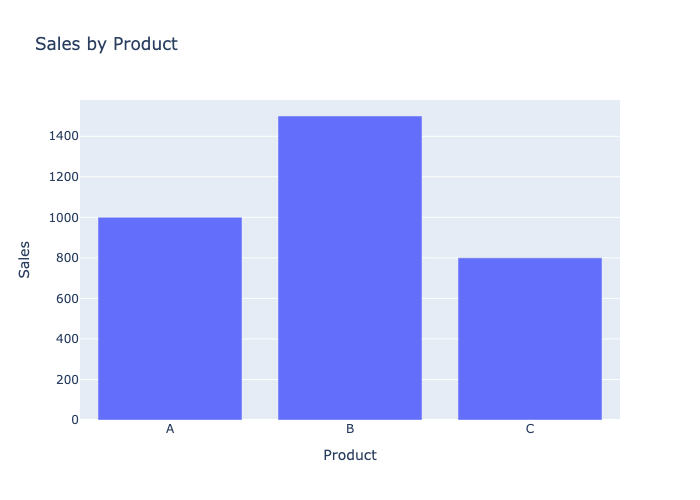

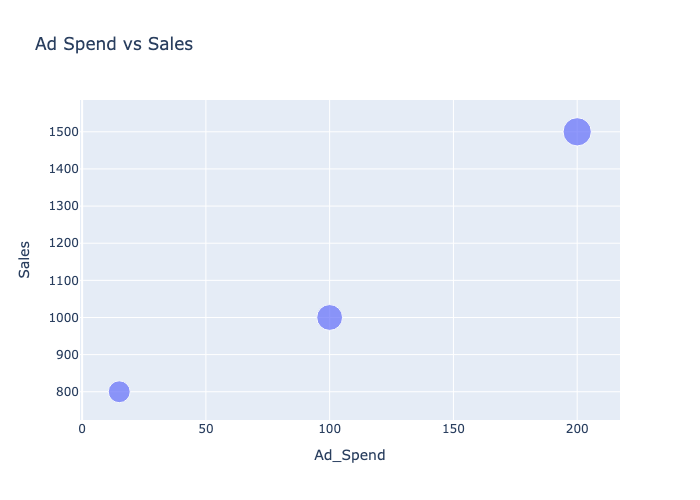

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

def create_sample_dashboard():
    sample_data = pd.DataFrame({
        'Product': ['A', 'B', 'C',],
        'Sales': [1000, 1500, 800],
        'Ad_Spend': [100, 200, 15],
        'CPC': [2.5, 3.0, 1.8]
    })
    fig1 = px.bar(sample_data, x='Product', y='Sales', title='Sales by Product')
    fig2 = px.scatter(sample_data, x='Ad_Spend', y='Sales', size='CPC', title='Ad Spend vs Sales')
    fig1.show()
    fig2.show()

create_sample_dashboard()